<a href="https://colab.research.google.com/github/jagvgithub/Classification_Regression_models/blob/main/ModeloFraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# paquetes necesarios
!pip install pycaret

# Librerias necearias
from google.colab import files  # carga de datos
import pandas as pd # manipulación de bases de datos
import numpy as np # manipulación de bases de datos
#import gender_guesser.detector as gender
#import gender_guesser.detector as gender # estimación de género a partir del primer y segundo nombre

In [46]:
from google.colab import files
import pandas as pd

# Cargar el archivo CSV
uploaded = files.upload()

Saving fraude_model.csv to fraude_model.csv


In [47]:
# Ruta al archivo xlsx en Google Colab
ruta_archivo = '/content/fraude_model.csv'  # Asegúrate de que la ruta sea correcta según la ubicación del archivo cargado

# Leer el archivo xlsx usando pandas
datos = pd.read_csv(ruta_archivo,sep='|', encoding='latin1')
datos=pd.DataFrame(datos)

In [48]:
print(datos.shape)

(58197, 35)


In [49]:
datos_numericos = datos.select_dtypes(include=['int', 'float'])

# Mostrar los tipos de datos de las columnas seleccionadas
print(datos_numericos.dtypes)

UTRNNO                  int64
TRANS_TYPE              int64
MSGTYPE                 int64
Cod_Aprovacion        float64
respuesta               int64
POS_ENTRY_MODE          int64
POS_CONDITION_CODE      int64
ECI                   float64
MCC                     int64
bin_amount            float64
country_number        float64
Testeos                 int64
Fraude                  int64
dtype: object


In [50]:
columnas = ['UTRNNO', 'TRANS_TYPE','MSGTYPE', 'Cod_Aprovacion','respuesta','POS_ENTRY_MODE','POS_CONDITION_CODE','ECI', 'MCC', 'country_number','Fraude','Testeos']

datos[columnas] = datos[columnas].astype(str)
print(datos.head())

         UTRNNO                    TTIME TRANS_TYPE    amount MSGTYPE  \
0  144770802315  2023-12-01T00:00:45.877        680   6500,00    1120   
1  144770802584  2023-12-01T00:01:06.663        774     20,00    1120   
2  144770802830  2023-12-01T00:01:26.387        680     13,57    1120   
3  144770803005  2023-12-01T00:01:38.193        680  27900,00    1120   
4  144770803143  2023-12-01T00:01:49.383        680     17,00    1120   

  Cod_Aprovacion respuesta POS_ENTRY_MODE POS_CONDITION_CODE  ECI  ...  \
0       305562.0        -1              1                 59  7.0  ...   
1            nan       953             10                  1  nan  ...   
2            nan       909              1                 59  7.0  ...   
3            nan       953             10                  8  2.0  ...   
4       145579.0        -1              1                 59  7.0  ...   

  pos_entry_mode_description    pos_condition_code_description  \
0       KEY ENTERED / MANUAL  TRANSACCION COMERCIO

In [51]:
datos_numericos = datos.select_dtypes(include=['int', 'float'])

# Mostrar los tipos de datos de las columnas seleccionadas
print(datos_numericos.dtypes)

bin_amount    float64
dtype: object


# ¿Cómo evitar el sobreajuste del modelo ?

* Evitar el sobreajuste (overfitting) es fundamental para desarrollar modelos de aprendizaje automático que generalicen bien a datos no vistos. Aquí tienes algunas técnicas comunes para mitigar el sobreajuste:

* Conjunto de datos más grande: A menudo, el sobreajuste ocurre cuando el modelo memoriza el ruido en el conjunto de datos de entrenamiento. Al tener más datos, el modelo puede aprender patrones más generales y reducir la probabilidad de memorizar el ruido.
* Validación cruzada: Utiliza la validación cruzada para evaluar el rendimiento del modelo en datos que no se utilizaron en el entrenamiento. Esto puede ayudar a detectar si el modelo está sobreajustando al comparar el rendimiento en los datos de entrenamiento y en los datos de validación.
* Regularización: Agrega términos de regularización a la función de pérdida durante el entrenamiento del modelo. Por ejemplo, en modelos lineales, la regularización L1 (Lasso) y L2 (Ridge) penalizan los coeficientes grandes. En modelos basados en árboles, puedes ajustar parámetros como la profundidad máxima del árbol para controlar su complejidad.
* Selección de características: Elimina características irrelevantes o redundantes que puedan estar introduciendo ruido en el modelo. Una selección cuidadosa de características puede ayudar a reducir la complejidad del modelo y evitar el sobreajuste.
* Cross-Validation de hiperparámetros: Realiza la búsqueda de hiperparámetros utilizando validación cruzada en lugar de simplemente dividir el conjunto de datos en entrenamiento y validación una sola vez. Esto ayuda a encontrar los hiperparámetros que producen un modelo generalizable en lugar de uno que se ajuste demasiado al conjunto de datos de entrenamiento.
* Regularización de dropout: En modelos de redes neuronales, el dropout es una técnica que consiste en aleatoriamente "apagar" neuronas durante el entrenamiento para evitar que el modelo se vuelva demasiado dependiente de características específicas.
* Aumento de datos: Genera datos adicionales a partir del conjunto de datos existente mediante técnicas como rotaciones, traslaciones, recortes, zooms, etc. Esto puede ayudar al modelo a capturar mejor la variabilidad de los datos y reducir el riesgo de sobreajuste.
* Al implementar estas técnicas de forma apropiada, puedes ayudar a evitar el sobreajuste y desarrollar modelos más robustos y generalizables.

In [52]:
datos.shape

(58197, 35)

In [53]:
datos.columns

Index(['UTRNNO', 'TTIME', 'TRANS_TYPE', 'amount', 'MSGTYPE', 'Cod_Aprovacion',
       'respuesta', 'POS_ENTRY_MODE', 'POS_CONDITION_CODE', 'ECI',
       'AUTORIZADOR', 'Comercio', 'MCC', 'Terminal', 'Nombre_Comercio',
       'Ciudad', 'COUNTRY_CODE', 'DATE_TIME', 'CARD_DATA_INPUT_MODE',
       'bin_amount', 'card_data_input_mode_description',
       'Tipo_Mensaje_description', 'Descripcion_Mcc', 'Description Ingles',
       'TRANSACTION DESCRIPTION', 'pos_entry_mode_description',
       'pos_condition_code_description', 'ECI_description', 'country_number',
       'Moneda', 'Ambiente2', 'Aprobacion_tx', 'Testeos', 'Fraude',
       'Naturaleza'],
      dtype='object')

In [54]:
# data=datosf.sample(frac=0.75,random_state=786).reset_index(drop=True) # entrenamiento
# data_unusen =datos.drop(data.index).reset_index(drop=True) # testeo
#data_unusen = datosf.drop(data.index).reset_index(drop=True)


# Separar las bases de datos en conjunto de entrenamiento y conjunto de prueba
#data = datosf.sample(frac=0.75, random_state=786).reset_index(drop=True)  # Conjunto de entrenamiento
#data_unusen = datosf.drop(data.index).reset_index(drop=True)             # Conjunto de prueba

data=datos.sample(frac=0.75,random_state=786).reset_index(drop=True) # entrenamiento
data_unusen =datos.drop(data.index).reset_index(drop=True) # testeo


# Verificar el tamaño de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", data.shape)
print("Tamaño del conjunto de prueba:", data_unusen.shape)



Tamaño del conjunto de entrenamiento: (43648, 35)
Tamaño del conjunto de prueba: (14549, 35)


In [77]:
data.dtypes

UTRNNO                               object
TTIME                                object
TRANS_TYPE                           object
amount                               object
MSGTYPE                              object
Cod_Aprovacion                       object
respuesta                            object
POS_ENTRY_MODE                       object
POS_CONDITION_CODE                   object
ECI                                  object
AUTORIZADOR                          object
Comercio                             object
MCC                                  object
Terminal                             object
Nombre_Comercio                      object
Ciudad                               object
COUNTRY_CODE                         object
DATE_TIME                            object
CARD_DATA_INPUT_MODE                 object
bin_amount                          float64
card_data_input_mode_description     object
Tipo_Mensaje_description             object
Descripcion_Mcc                 

In [78]:
data.head()

,UTRNNO,TTIME,TRANS_TYPE,amount,MSGTYPE,Cod_Aprovacion,respuesta,POS_ENTRY_MODE,POS_CONDITION_CODE,ECI,...,pos_entry_mode_description,pos_condition_code_description,ECI_description,country_number,Moneda,Ambiente2,Aprobacion_tx,Testeos,Fraude,Naturaleza
0,144821323389,2023-12-16T15:18:56.130,796,"0,00",1120,nan,812,0,51,0.0,...,TERMINAL NOT USED,RESERVADO PARA USO PRIVADO,No aplica,170.0,PESO COLOMBIANO,No Presente,Rechazada,1,0,credito
1,144778727349,2023-12-02T19:37:01.363,796,"0,00",1120,50032.0,827,1,51,7.0,...,KEY ENTERED / MANUAL,RESERVADO PARA USO PRIVADO,Transacción de seguridad no autenticada,442.0,EURO,No Presente,Rechazada,1,0,credito
2,144794133740,2023-12-07T11:50:40.623,796,"0,00",1120,nan,812,0,51,0.0,...,TERMINAL NOT USED,RESERVADO PARA USO PRIVADO,No aplica,170.0,PESO COLOMBIANO,No Presente,Rechazada,1,0,credito
3,144776124583,2023-12-02T11:08:09.163,774,"43137,00",1120,353286.0,-1,7,0,nan,...,CONTACTLESS,NaN,NaN,170.0,PESO COLOMBIANO,Presente,Aprobada,0,0,credito
4,144780618089,2023-12-03T12:44:17.913,774,"800000,00",1120,388509.0,-1,7,0,nan,...,CONTACTLESS,NaN,NaN,170.0,PESO COLOMBIANO,Presente,Aprobada,0,0,credito


In [75]:
list(data.columns)

['UTRNNO',
 'TTIME',
 'TRANS_TYPE',
 'amount',
 'MSGTYPE',
 'Cod_Aprovacion',
 'respuesta',
 'POS_ENTRY_MODE',
 'POS_CONDITION_CODE',
 'ECI',
 'AUTORIZADOR',
 'Comercio',
 'MCC',
 'Terminal',
 'Nombre_Comercio',
 'Ciudad',
 'COUNTRY_CODE',
 'DATE_TIME',
 'CARD_DATA_INPUT_MODE',
 'bin_amount',
 'card_data_input_mode_description',
 'Tipo_Mensaje_description',
 'Descripcion_Mcc',
 'Description Ingles',
 'TRANSACTION DESCRIPTION',
 'pos_entry_mode_description',
 'pos_condition_code_description',
 'ECI_description',
 'country_number',
 'Moneda',
 'Ambiente2',
 'Aprobacion_tx',
 'Testeos',
 'Fraude',
 'Naturaleza']

In [56]:
from pycaret.classification import * # la data ya tiene una marcacion de  01
data.reset_index(drop=True, inplace=True)  # Restablecer los índices y eliminar los índices existentes ## debido al concatenado
#exp_clf101 = setup(data=data, target='Fraude', session_id=10001)  # Configurar el experimento de clasificación


exp_clf101 = setup(data=data, target='Fraude', session_id=10001, fold_strategy='stratifiedkfold') # garantizar que todas las clases esten bien representadas


,Description,Value
0,Session id,10001
1,Target,Fraude
2,Target type,Binary
3,Target mapping,"0: 0, 1: 1"
4,Original data shape,"(43648, 35)"
5,Transformed data shape,"(43648, 104)"
6,Transformed train set shape,"(30553, 104)"
7,Transformed test set shape,"(13095, 104)"
8,Numeric features,1
9,Categorical features,33


In [57]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9247,0.9313,0.9247,0.9242,0.9148,0.6175,0.6518,15.5120
knn,K Neighbors Classifier,0.9174,0.8278,0.9174,0.9118,0.9105,0.6081,0.6228,5.1170
ridge,Ridge Classifier,0.8582,0.8952,0.8582,0.7648,0.7927,0.0008,0.0089,3.6840
et,Extra Trees Classifier,0.8582,0.8529,0.8582,0.7648,0.7927,0.0008,0.0089,4.6670
dt,Decision Tree Classifier,0.8581,0.5000,0.8581,0.7364,0.7926,0.0000,0.0000,3.5430
rf,Random Forest Classifier,0.8581,0.7388,0.8581,0.7506,0.7927,0.0004,0.0044,4.7610
qda,Quadratic Discriminant Analysis,0.8581,0.7679,0.8581,0.7364,0.7926,-0.0001,-0.0007,3.8380
ada,Ada Boost Classifier,0.8581,0.5000,0.8581,0.7364,0.7926,0.0000,0.0000,3.4860
gbc,Gradient Boosting Classifier,0.8581,0.5002,0.8581,0.7364,0.7926,0.0000,0.0000,6.7870
lda,Linear Discriminant Analysis,0.8581,0.5000,0.8581,0.7364,0.7926,0.0000,0.0000,4.1110


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

* Accuracy: La precisión del modelo es del 94.41%. Esto indica la proporción de predicciones correctas que el modelo ha hecho en el conjunto de datos de prueba. Una precisión alta sugiere que el modelo es capaz de clasificar correctamente la mayoría de las instancias.
* AUC (Area Under Curve): El área bajo la curva ROC (AUC) es del 96.17%. La curva ROC es una representación gráfica de la sensibilidad (Recall) frente a la especificidad. Un AUC alto sugiere que el modelo es capaz de distinguir entre las clases positivas y negativas de manera efectiva.
Recall: El recall del modelo es del 94.41%. Esto indica la proporción de instancias positivas que el modelo ha identificado correctamente de todas las instancias positivas presentes en el conjunto de datos de prueba. Un recall alto sugiere que el modelo es capaz de identificar la mayoría de las instancias positivas.
* Precisión: La precisión del modelo es del 94.51%. Esto indica la proporción de instancias clasificadas como positivas que realmente son positivas. Una precisión alta sugiere que el modelo hace pocas falsas alarmas al predecir instancias positivas.
* F1-score: El F1-score del modelo es del 93.90%. El F1-score es la media armónica de la precisión y el recall. Es útil cuando hay un desequilibrio entre las clases. Un F1-score alto indica un buen equilibrio entre precisión y recall.
* Kappa: El coeficiente kappa del modelo es de 0.7314. El coeficiente kappa mide la concordancia entre las predicciones del modelo y las etiquetas reales, teniendo en cuenta la posibilidad de que las coincidencias ocurran al azar. Un valor alto de kappa sugiere una buena concordancia entre las predicciones y las etiquetas reales.
* MCC (Matthews correlation coefficient): El coeficiente de correlación de Matthews (MCC) del modelo es de 0.7526. Es una medida de la calidad de la clasificación binaria que tiene en cuenta los cuatro resultados posibles de la clasificación. Un valor alto de MCC indica una buena calidad de clasificación.
En resumen, el modelo de regresión logística parece tener un buen rendimiento en términos de precisión, recall, precisión y F1-score, así como una buena capacidad de distinguir entre clases positivas y negativas según el AUC.

In [58]:
modelo = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9149,0.9263,0.9149,0.9130,0.9030,0.5626,0.6014
1,0.9473,0.9379,0.9473,0.9473,0.9434,0.7532,0.7684
2,0.9152,0.9508,0.9152,0.9141,0.9030,0.5616,0.6030
3,0.9103,0.9260,0.9103,0.9120,0.8943,0.5155,0.5736
4,0.9355,0.9363,0.9355,0.9351,0.9293,0.6877,0.7100
5,0.9129,0.9187,0.9129,0.9142,0.8983,0.5356,0.5888
6,0.9303,0.9270,0.9303,0.9302,0.9225,0.6545,0.6832
7,0.9077,0.9367,0.9077,0.9089,0.8907,0.4976,0.5580
8,0.9391,0.9297,0.9391,0.9370,0.9352,0.7195,0.7304


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [59]:
tuned_modelo = tune_model(modelo)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9287,0.9353,0.9287,0.9253,0.9261,0.6868,0.6901
1,0.9434,0.9471,0.9434,0.9412,0.9410,0.7491,0.7538
2,0.9192,0.9412,0.9192,0.9153,0.9105,0.6031,0.6272
3,0.9293,0.9289,0.9293,0.9267,0.9230,0.6610,0.6796
4,0.9264,0.9300,0.9264,0.9224,0.9207,0.6535,0.6672
5,0.9034,0.8948,0.9034,0.8950,0.8925,0.5203,0.5439
6,0.9381,0.9010,0.9381,0.9360,0.9339,0.7128,0.7247
7,0.9129,0.9310,0.9129,0.9197,0.9156,0.6647,0.6673
8,0.9175,0.9372,0.9175,0.9240,0.9200,0.6829,0.6856


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [60]:
print(tuned_modelo)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10001, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
help(plot_model) # validacion visual

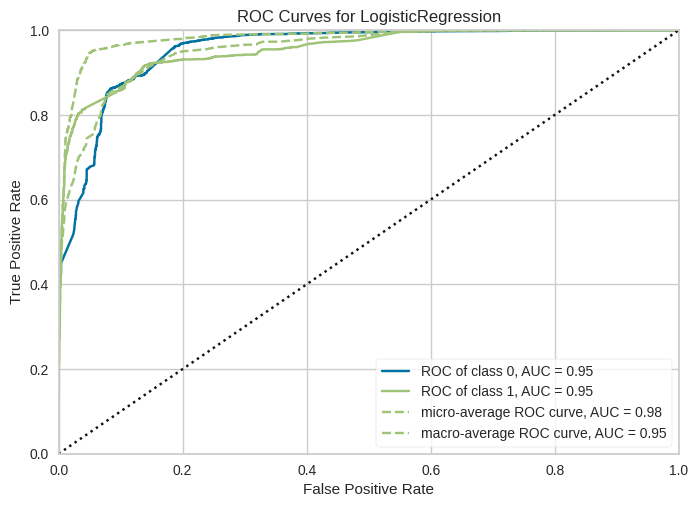

In [61]:
plot_model(tuned_modelo,plot='auc')

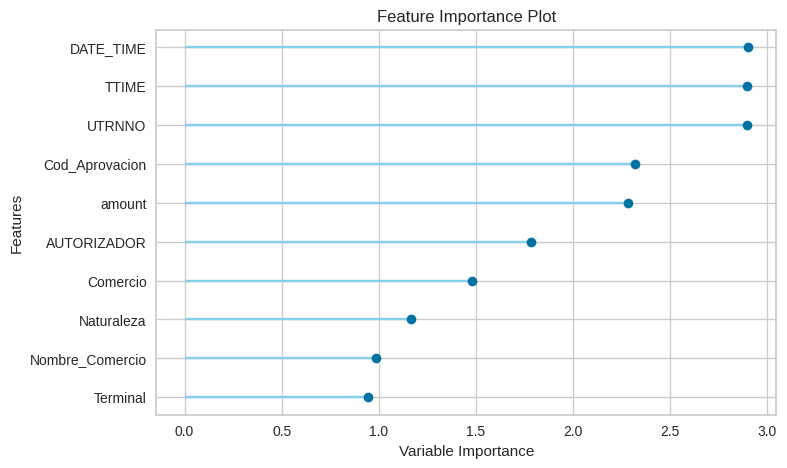

In [62]:
# feature importance
plot_model(tuned_modelo,plot='feature')

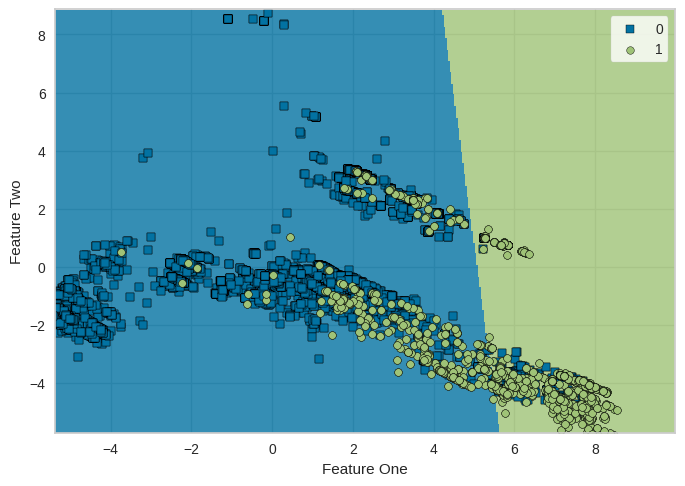

In [63]:
## Decision Boundary
plot_model(tuned_modelo, plot = 'boundary')

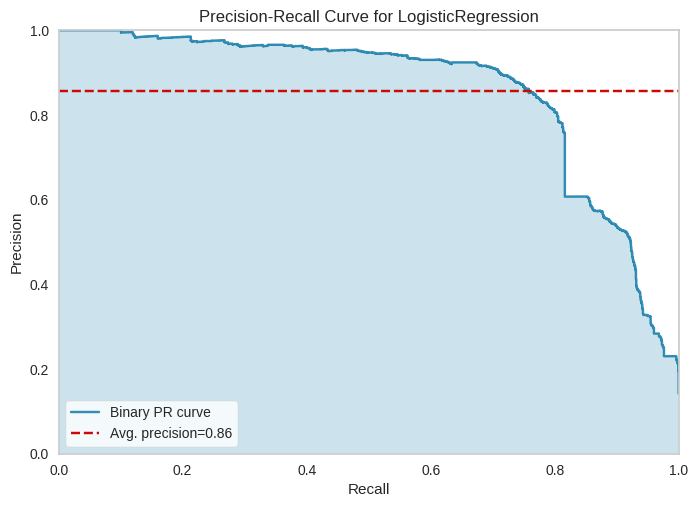

In [64]:
# Precision Recall Curve
plot_model(tuned_modelo, plot = 'pr')


In [ ]:
# Validation Curve
plot_model(tuned_modelo, plot = 'vc')


In [67]:
from pycaret.classification import *
predicciones = predict_model(tuned_modelo,data=data_unusen)

predicciones.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8821,0.9773,0.8821,0.9003,0.8809,0.7647,0.7824


ValueError: y contains previously unseen labels: 0

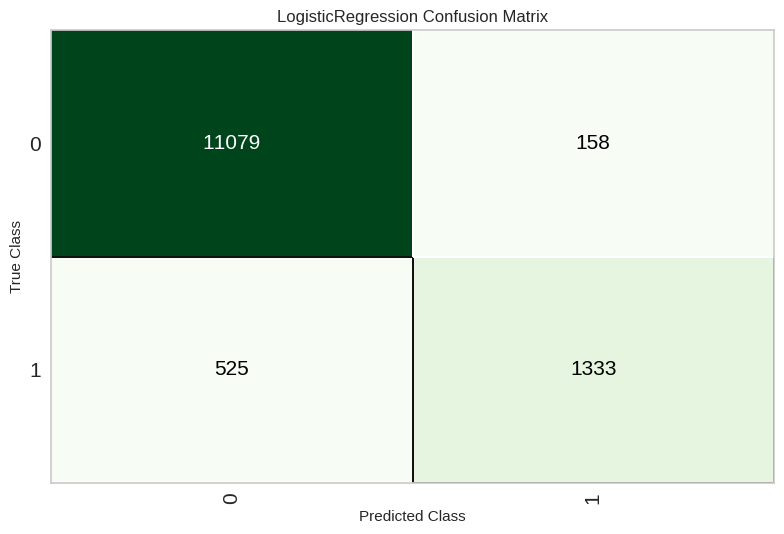

In [66]:

plot_model(tuned_modelo,'confusion_matrix')

In [68]:
# modelo final entrenado con todo el conjunto de datos

final_modelo=finalize_model(tuned_modelo)

In [69]:
print(final_modelo)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=['bin_amount'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy=...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
               

In [72]:
import os

directorio_actual = os.getcwd()
print("El directorio actual es:", directorio_actual)


El directorio actual es: /content


In [73]:
save_model(final_modelo,'ModeloProduccionFacturacion')
#save_model(final_modelo, model_name='C:\\Users\\josgom\\Desktop\\python\\Modelos\\ModeloProduccionFacturacion')

#save_model(final_modelo, model_name='C:\\Users\\josgom\\Desktop\\python\\Modelos\\ModeloProduccionFacturacion')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['bin_amount'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy=...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
 

In [74]:
from google.colab import drive
from pycaret.classification import save_model

# Monta Google Drive
drive.mount('/content/drive')

# Guarda el modelo en la carpeta de Google Drive
modelo_a_guardar = final_modelo  # Reemplaza 'final_modelo' con tu modelo
nombre_del_modelo = 'ModeloProduccionFacturacion'  # Nombre del modelo
ruta_carpeta_drive = '/content/drive/My Drive/Modelos_FA'  # Ruta de la carpeta en Google Drive

# Guarda el modelo
save_model(modelo_a_guardar, f'{ruta_carpeta_drive}/{nombre_del_modelo}')

# Muestra un mensaje de confirmación
print("El modelo se guardó en Google Drive.")


Mounted at /content/drive
Transformation Pipeline and Model Successfully Saved
El modelo se guardó en Google Drive.
